## This is a jupyter Notebook file to practice Irish dataset

### Importations

In [42]:
# importing libraries
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Read file
# The location of the data file is being stored into a variable
filepath = 'Iris.csv'
# Import the data
data = pd.read_csv(filepath)

In [12]:
# Print a few rows start to index 4
print(data.iloc[:5])

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [13]:
# Create a new column 'sepal_area' that is a product of both measurements
data['sepalAreaCm'] = data.SepalLengthCm * data.SepalWidthCm


# Print a few rows and columns
# Print rows zero to index 4 and the last three columns
print(data.iloc[:5, -3:])

   PetalWidthCm      Species  sepalAreaCm
0           0.2  Iris-setosa        17.85
1           0.2  Iris-setosa        14.70
2           0.2  Iris-setosa        15.04
3           0.2  Iris-setosa        14.26
4           0.2  Iris-setosa        18.00


In [14]:
# The lambda function applies what follows it to each row of data and replacing the content by nothing(empty string)
data['abbrev'] = (data.Species.apply(lambda x: x.replace('Iris-','')))

# Note that there are other ways to accomplish the above
print(data.iloc[:5, -3:])

       Species  sepalAreaCm  abbrev
0  Iris-setosa        17.85  setosa
1  Iris-setosa        14.70  setosa
2  Iris-setosa        15.04  setosa
3  Iris-setosa        14.26  setosa
4  Iris-setosa        18.00  setosa


In [15]:
# We can Concatenate the first two and last two rows
small_data = pd.concat([data.iloc[:2],
data.iloc[-2:]])
print(small_data.iloc[:,-3:])

            Species  sepalAreaCm     abbrev
0       Iris-setosa        17.85     setosa
1       Iris-setosa        14.70     setosa
148  Iris-virginica        21.08  virginica
149  Iris-virginica        17.70  virginica


### Aggregated Statistics with GroupBy

In [16]:
print(data.iloc[:5])

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   sepalAreaCm  abbrev  
0        17.85  setosa  
1        14.70  setosa  
2        15.04  setosa  
3        14.26  setosa  
4        18.00  setosa  


In [19]:
# count the different values in the respective columns
print(data.count())

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
sepalAreaCm      150
abbrev           150
dtype: int64


In [21]:
# Use the size method with a DataFrame to get count
# For a Series, use the .value_counts method
group_sizes = (data.groupby('Species').size())
print(group_sizes)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Performing Statistical Calculations

In [22]:
# Mean calculated on a DataFrame
print(data.mean())

Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
sepalAreaCm      17.806533
dtype: float64


C:\Users\hkaluuma\AppData\Local\Temp\ipykernel_13908\4024397745.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.mean())


In [24]:
# Median calculated on a Series on a specific column
print(data.PetalLengthCm.median())

4.35


In [25]:
# General Median calculated on a Series
print(data.median())

Id               75.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
sepalAreaCm      17.66
dtype: float64


C:\Users\hkaluuma\AppData\Local\Temp\ipykernel_13908\3265241984.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.median())


In [27]:
# Mode calculated on a Series
print(data.PetalLengthCm.mode())

0    1.5
Name: PetalLengthCm, dtype: float64


In [31]:
# Calculating Mode calculated on all columns
print(data.sepalAreaCm.mode())

0    15.66
Name: sepalAreaCm, dtype: float64


### Performing More advanced Statistical Calculations

In [34]:
# Standard dev, variance, and standard error of the mean (SEM)
print(data.PetalLengthCm.std())

1.7644204199522617


In [35]:
print(data.PetalLengthCm.var())

3.1131794183445156


In [36]:
print(data.PetalLengthCm.sem())

0.1440643240210084


In [37]:
# As well as quantiles
print(data.quantile(0))

Id                1.0
SepalLengthCm     4.3
SepalWidthCm      2.0
PetalLengthCm     1.0
PetalWidthCm      0.1
sepalAreaCm      10.0
Name: 0.0, dtype: float64


In [38]:
# Print the data describing in summary all the data
print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count  150.000000     150.000000    150.000000     150.000000    150.000000   
mean    75.500000       5.843333      3.054000       3.758667      1.198667   
std     43.445368       0.828066      0.433594       1.764420      0.763161   
min      1.000000       4.300000      2.000000       1.000000      0.100000   
25%     38.250000       5.100000      2.800000       1.600000      0.300000   
50%     75.500000       5.800000      3.000000       4.350000      1.300000   
75%    112.750000       6.400000      3.300000       5.100000      1.800000   
max    150.000000       7.900000      4.400000       6.900000      2.500000   

       sepalAreaCm  
count   150.000000  
mean     17.806533  
std       3.368693  
min      10.000000  
25%      15.645000  
50%      17.660000  
75%      20.325000  
max      30.020000  


In [39]:
# Sampling data from the listed data
# Sample 5 rows without replacement
sample = (data.sample(n=5, replace=False, random_state=42))
print(sample.iloc[:,-3:])

             Species  sepalAreaCm      abbrev
73   Iris-versicolor        17.08  versicolor
18       Iris-setosa        21.66      setosa
118   Iris-virginica        20.02   virginica
78   Iris-versicolor        17.40  versicolor
76   Iris-versicolor        19.04  versicolor


### Visualization Libraries

#### Scatter Plots with matplotlib

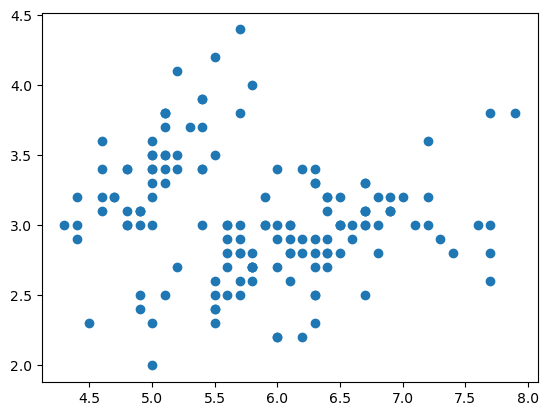

In [44]:
plt.plot(data.SepalLengthCm, data.SepalWidthCm, ls ='', marker='o')

#### Ploting both Sebal and Petal

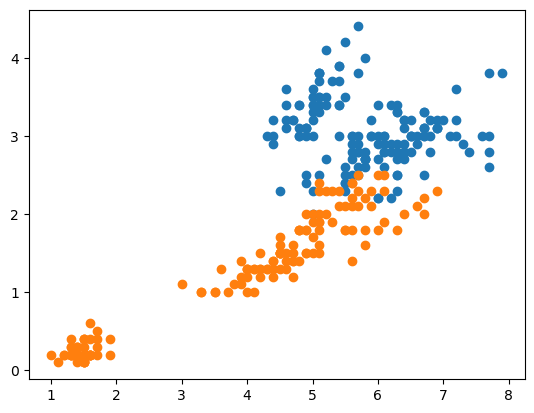

In [50]:
plt.plot(data.SepalLengthCm, data.SepalWidthCm, ls ='', marker='o', label='Sepal')

plt.plot(data.PetalLengthCm, data.PetalWidthCm, ls ='', marker='o', label='Petal')

#### Histograms with Matplotlib

(array([ 4.,  1.,  6.,  5., 16.,  9.,  5.,  6.,  7., 14.,  7.,  9.,  6.,
        13.,  7.,  7.,  8.,  3.,  5.,  1.,  4.,  1.,  1.,  4.,  1.]),
 array([4.3  , 4.444, 4.588, 4.732, 4.876, 5.02 , 5.164, 5.308, 5.452,
        5.596, 5.74 , 5.884, 6.028, 6.172, 6.316, 6.46 , 6.604, 6.748,
        6.892, 7.036, 7.18 , 7.324, 7.468, 7.612, 7.756, 7.9  ]),
 <BarContainer object of 25 artists>)

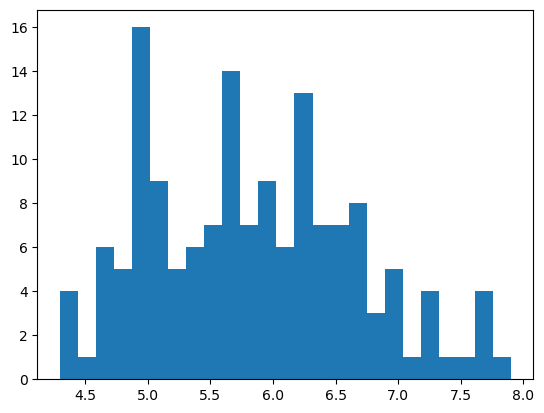

In [51]:
plt.hist(data.SepalLengthCm, bins=25)

#### Customizing matplotlib

[Text(0.5, 0, 'xlabel'),
 Text(0, 0.5, 'ylabel'),
 Text(0.5, 1.0, 'This is our Histogram')]

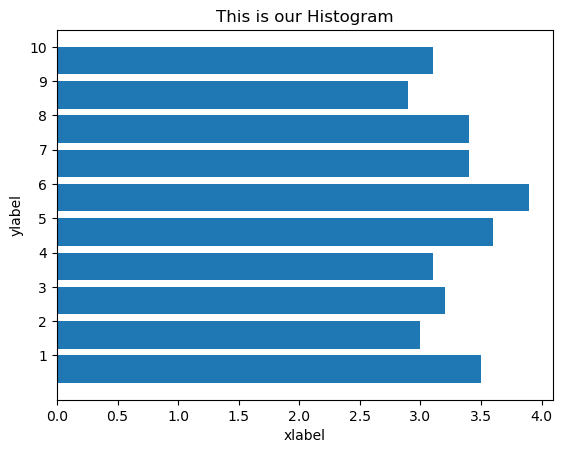

In [53]:
fig, ax = plt.subplots()

ax.barh(np.arange(10),
data.SepalWidthCm.iloc[:10])

# Set position of ticks and tick labels
ax.set_yticks(np.arange(0.4,10.4,1.0))
ax.set_yticklabels(np.arange(1,11))
ax.set(xlabel='xlabel', ylabel='ylabel',
title='This is our Histogram')

#### Statical methods using pandas methods

<AxesSubplot: xlabel='Species'>

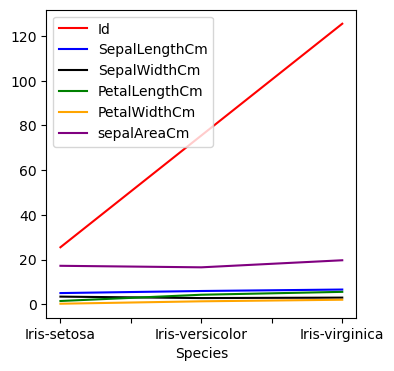

In [55]:
(data.groupby('Species').mean().plot(color=['red','blue','black','green','orange', 'purple'], fontsize=10.0, figsize=(4,4)))

#### Joint distribution and scatter plots can be created

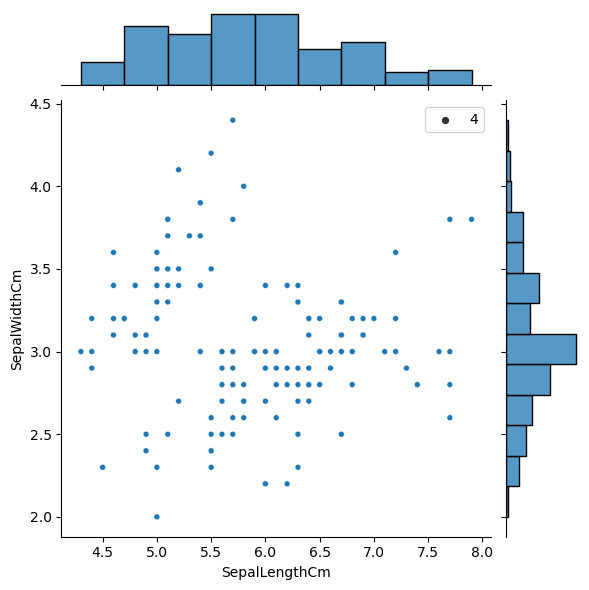

In [59]:
sb.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=data, size=4)

#### Correlation plots of all variable pairs can also be made with Seaborn

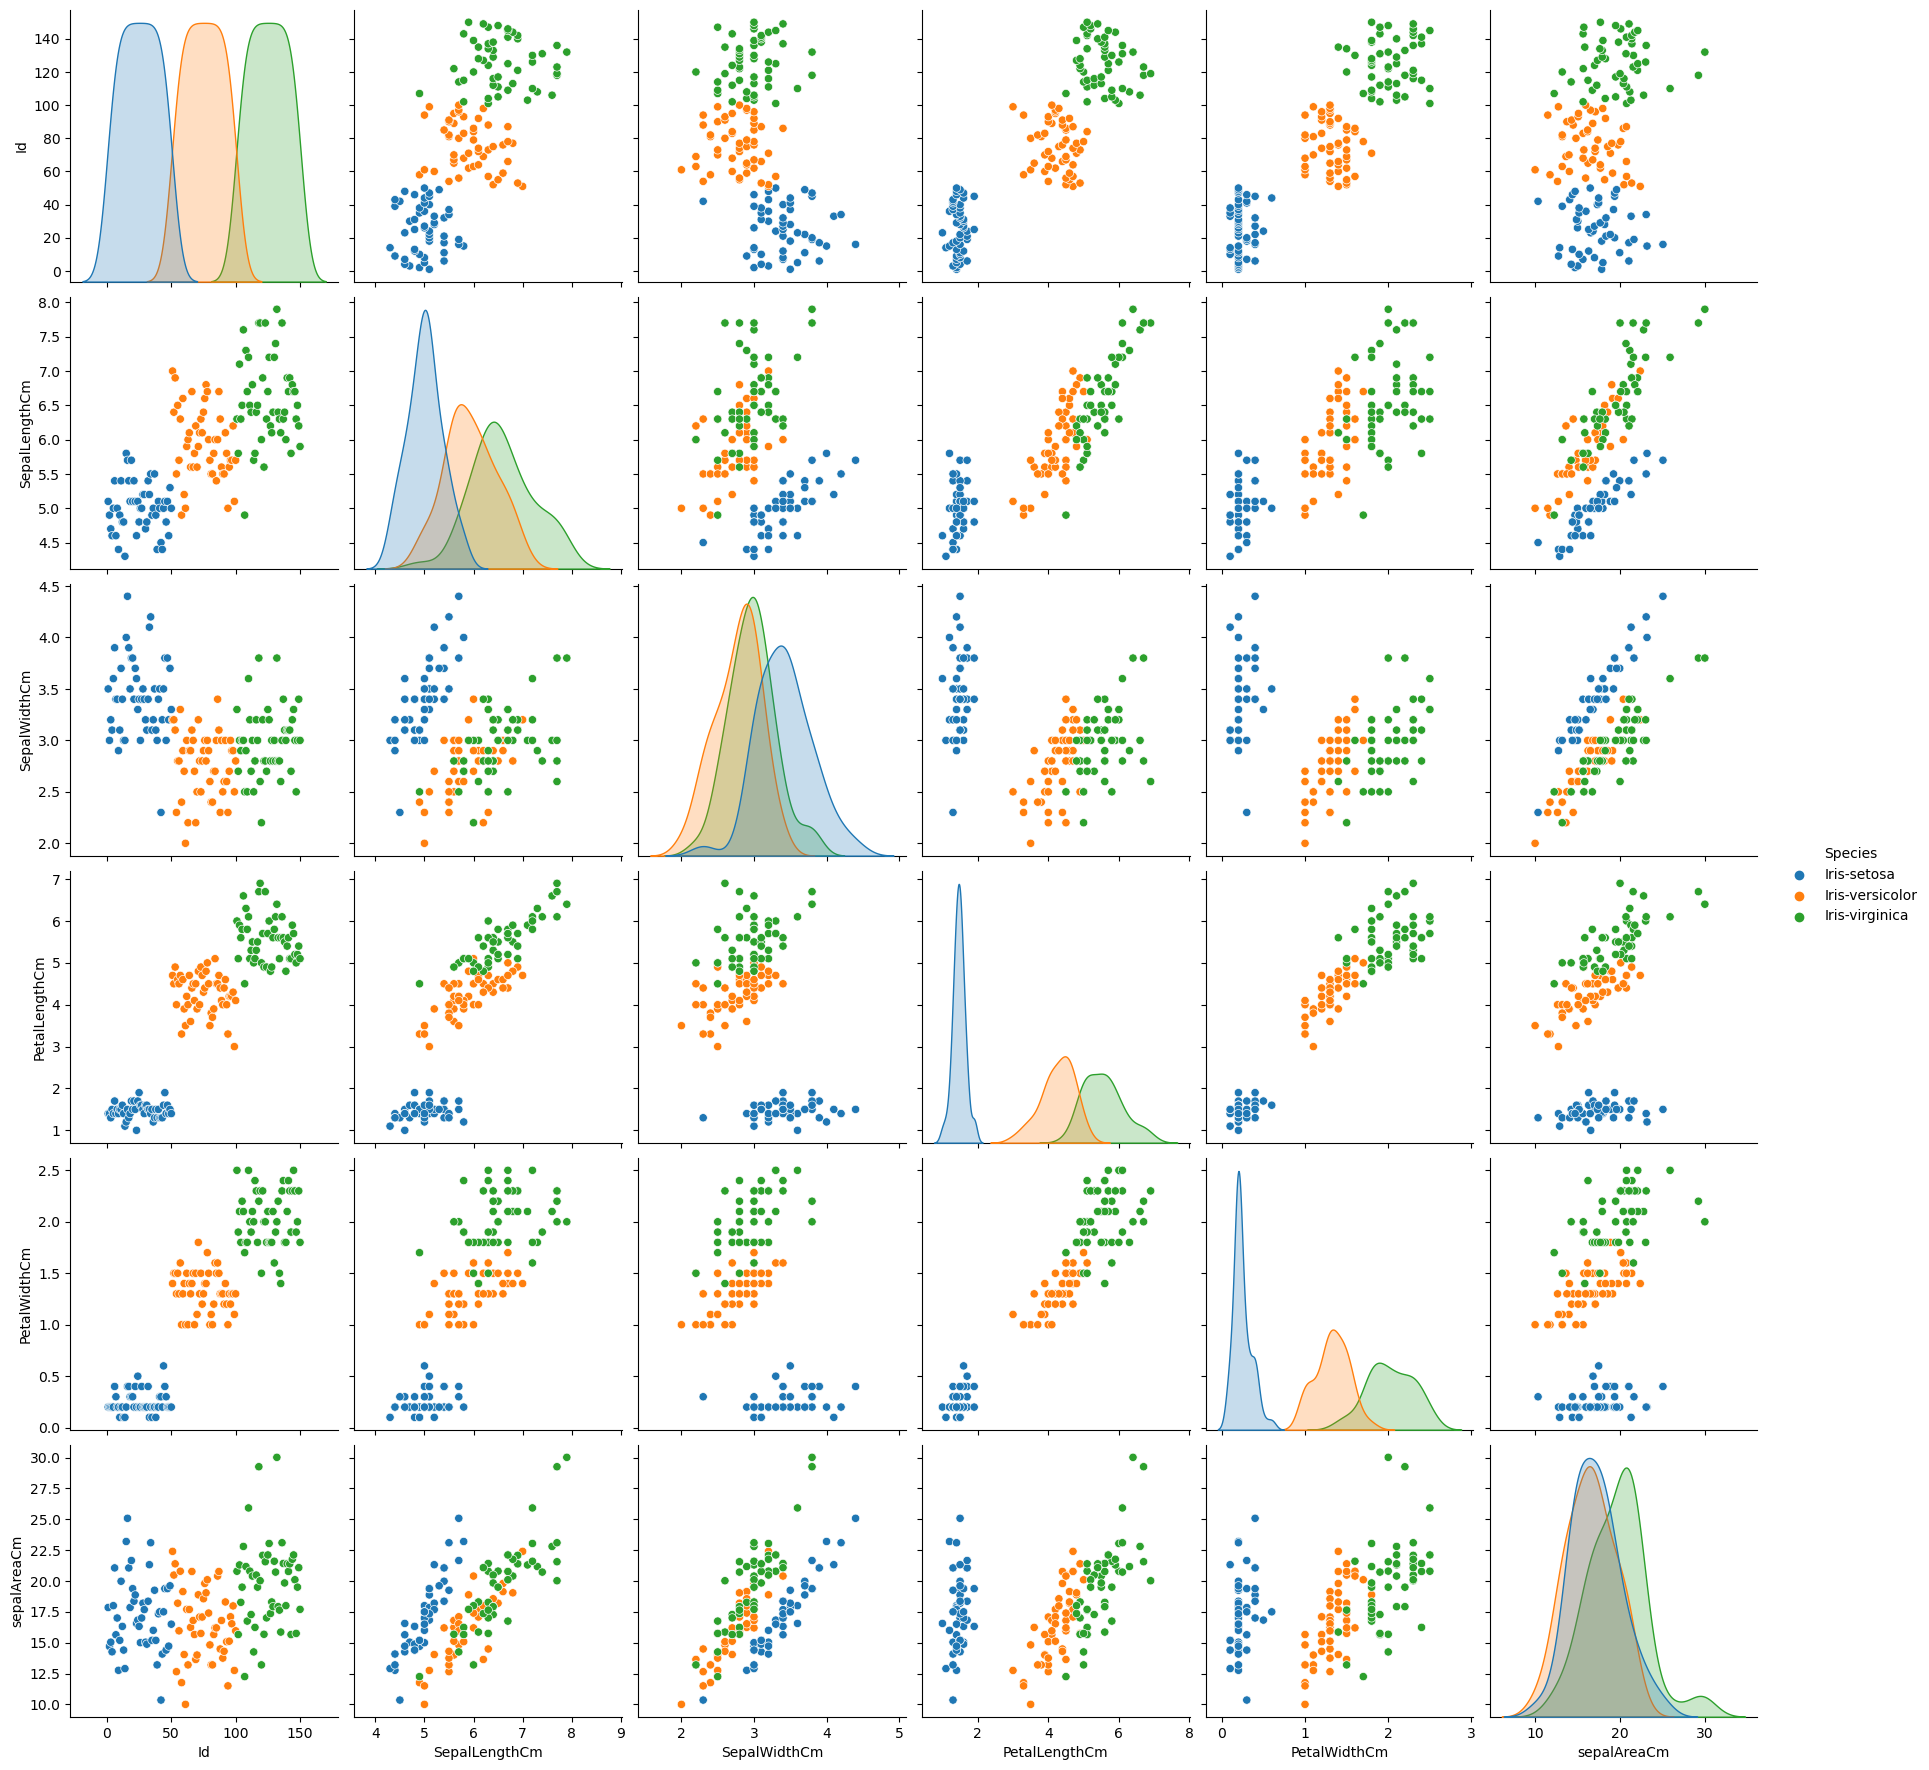

In [62]:
sb.pairplot(data, hue='Species', height=3)